# Factor Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ratings-of-acquiantances" data-toc-modified-id="Ratings-of-acquiantances-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ratings of acquiantances</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Determine-appropriate-number-of-common-factors" data-toc-modified-id="Determine-appropriate-number-of-common-factors-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Determine appropriate number of common factors</a></span></li><li><span><a href="#Apply-factor-analysis" data-toc-modified-id="Apply-factor-analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Apply factor analysis</a></span></li></ul></li><li><span><a href="#Factor-rotation" data-toc-modified-id="Factor-rotation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Factor rotation</a></span><ul class="toc-item"><li><span><a href="#Fit-model-with-varimax-rotation" data-toc-modified-id="Fit-model-with-varimax-rotation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fit model with varimax rotation</a></span></li><li><span><a href="#Show-factor-loadings" data-toc-modified-id="Show-factor-loadings-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Show factor loadings</a></span></li></ul></li><li><span><a href="#Factor-scores" data-toc-modified-id="Factor-scores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Factor scores</a></span></li><li><span><a href="#Your-Turn:-Customer-preference-data" data-toc-modified-id="Your-Turn:-Customer-preference-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><font color="orange">Your Turn: Customer preference data</font></a></span></li></ul></div>

In [1]:
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.color_palette("RdBu", n_colors=10)

# Interactive plots embedded within the notebook
#%matplotlib notebook 
# Static images of plots embedded within the notebook
%matplotlib inline   
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm


#pd.options.plotting.backend = "plotly" 
# Conflict with options in original matplotlib.

print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version', sns.__version__)
print('Statsmodels version', sm.__version__)

Numpy version 1.21.2
Pandas version 1.3.2
Seaborn version 0.11.2
Statsmodels version 0.12.2


**Install factor analyzer package first..** 

pip install factor_analyzer

See https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

In [2]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

## Ratings of acquiantances

### Load data

In [3]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
#pd.set_option('display.precision', 4)

ratings_df = pd.DataFrame(data=[[1,5,5,1,1],
                                [8,9,7,9,8],
                                [9,8,9,9,8],
                                [9,9,9,9,9],
                                [1,9,1,1,9],
                                [9,7,7,9,9],
                                [9,7,9,9,7]],
                          columns = ['Kind','Intelligent','Happy','Likable','Just'],
                          index = ['P1','P2','P3','P4','P5','P6','P7'])
ratings_df.corr()
#norm_df = (df - df.mean(axis=0))/df.std(axis=0)
#groups={'Personality':list(df.columns)}

,Kind,Intelligent,Happy,Likable,Just
Kind,1.0000,0.2955,0.8806,0.9954,0.5446
Intelligent,0.2955,1.0000,-0.0217,0.3262,0.8373
Happy,0.8806,-0.0217,1.0000,0.8667,0.1303
Likable,0.9954,0.3262,0.8667,1.0000,0.5440
Just,0.5446,0.8373,0.1303,0.5440,1.0000


### Determine appropriate number of common factors

In [4]:
import numpy as np

eigval,eigvec=np.linalg.eig(ratings_df.corr())
  
# Sort descendingly
sorted_eigval = -np.sort(-eigval)
sorted_eigval

array([3.2632e+00, 1.5383e+00, 1.6785e-01, 3.0592e-02, 1.8949e-16])

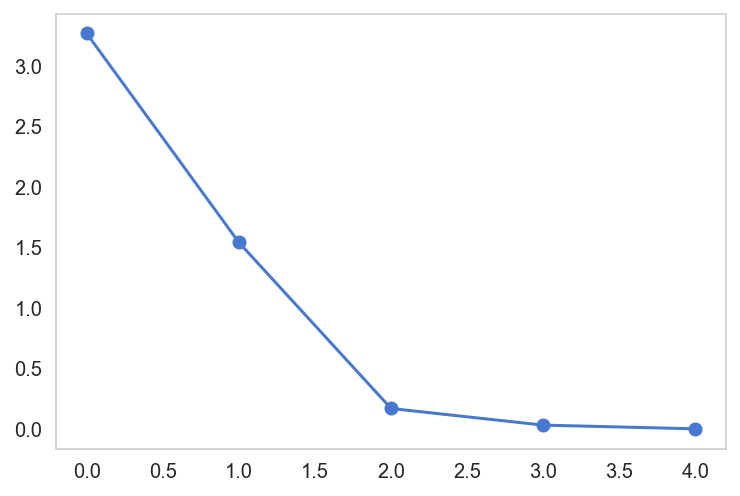

In [5]:
plt.plot(sorted_eigval, '-o');

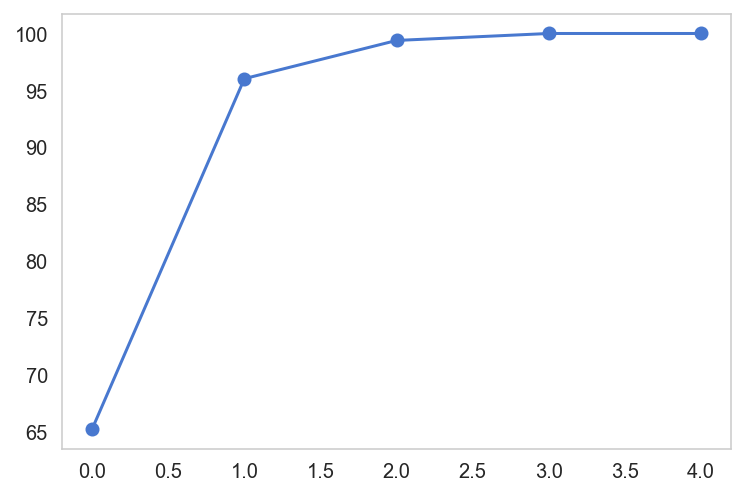

In [6]:
plt.plot(np.cumsum(sorted_eigval)*100/len(sorted_eigval), '-o');

### Apply factor analysis
Create factor analysis object and perform factor analysis

In [7]:
import numpy as np
from factor_analyzer import FactorAnalyzer

np.set_printoptions(precision=4)

NUM_FACTORS=2
fa = FactorAnalyzer(n_factors=2, rotation=None, is_corr_matrix=False)

# Use method='principal'to get the same results as in the textbook.

fa.fit(ratings_df)
print(fa.loadings_)

FactorAnalyzer(n_factors=2, rotation=None, rotation_kwargs={})

[[ 0.9771 -0.2123]
 [ 0.4692  0.7038]
 [ 0.777  -0.5632]
 [ 0.9768 -0.1911]
 [ 0.6994  0.717 ]]


## Factor rotation

### Fit model with varimax rotation

In [8]:
# Create factor analysis object and perform factor analysis

from factor_analyzer import FactorAnalyzer


NUM_FACTORS=2
fa = FactorAnalyzer(n_factors=NUM_FACTORS,  rotation='varimax') 
fa.fit(ratings_df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

### Show factor loadings

In [9]:
print(fa.loadings_)

[[ 0.9511  0.3088]
 [ 0.0509  0.8443]
 [ 0.9549 -0.0952]
 [ 0.9401  0.3269]
 [ 0.2431  0.9717]]


## Factor scores

In [10]:
fa.transform(ratings_df)

array([[-0.9109, -2.1998],
       [ 0.5118,  0.1276],
       [ 0.6602,  0.1276],
       [ 0.5071,  0.5951],
       [-2.0496,  1.1498],
       [ 0.5383,  0.4232],
       [ 0.8079, -0.3405]])

In [11]:
scores_df = pd.DataFrame(data=fa.transform(ratings_df),
                         columns=['F'+str(i+1) for i in range(NUM_FACTORS)])
scores_df.set_index(ratings_df.index, inplace=True)
scores_df.index.rename('Person', inplace=True)

In [12]:
scores_df
scores_df.corr()

,F1,F2
Person,,
P1,-0.9109,-2.1998
P2,0.5118,0.1276
P3,0.6602,0.1276
P4,0.5071,0.5951
P5,-2.0496,1.1498
P6,0.5383,0.4232
P7,0.8079,-0.3405


,F1,F2
F1,1.0000,0.0076
F2,0.0076,1.0000


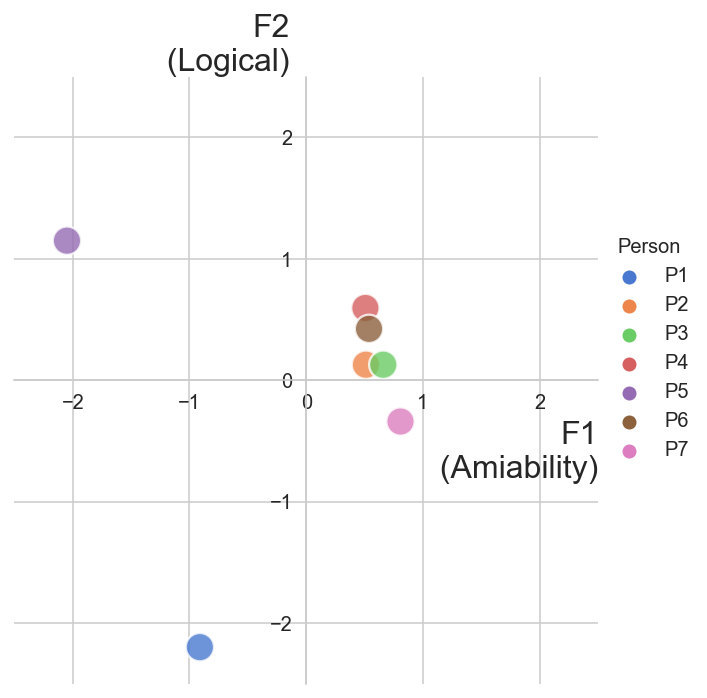

In [13]:
sns.set_style({'axes.grid' : True})
sns.set_context({"axes.labelsize": '16'})
sns.relplot(data=scores_df, x="F1", y="F2", hue="Person", s=200, alpha=0.8, palette='muted')
plt.xlabel('F1\n (Amiability)', loc='right')
plt.ylabel('F2\n (Logical)', rotation=0, loc='top', labelpad=-10)
plt.xlim(-2.5,2.5); plt.ylim(-2.5,2.5)
plt.gca().spines[:].set_position('center');

## <font color='orange'>Your Turn: Customer preference data</font>

In [14]:
customer_corr = pd.DataFrame(data=[[1.00, 0.02, 0.96, 0.42, 0.01],
                                [0.02, 1.00, 0.13, 0.71, 0.85],
                                [0.96, 0.13, 1.00, 0.50, 0.11],
                                [0.42, 0.71, 0.50, 1.00, 0.79],
                                [0.01, 0.85, 0.11, 0.79, 1.00]],
                                columns = ['Taste','Prize','Flavor','Snack','Energy'],
                                index = ['Taste','Prize','Flavor','Snack','Energy'])
customer_corr

,Taste,Prize,Flavor,Snack,Energy
Taste,1.0000,0.0200,0.9600,0.4200,0.0100
Prize,0.0200,1.0000,0.1300,0.7100,0.8500
Flavor,0.9600,0.1300,1.0000,0.5000,0.1100
Snack,0.4200,0.7100,0.5000,1.0000,0.7900
Energy,0.0100,0.8500,0.1100,0.7900,1.0000


In [15]:
eigval,eigvec=np.linalg.eig(customer_corr)
  
# Sort descendingly
sorted_eigval = -np.sort(-eigval)
sorted_eigval

array([2.8531, 1.8063, 0.2045, 0.1024, 0.0337])

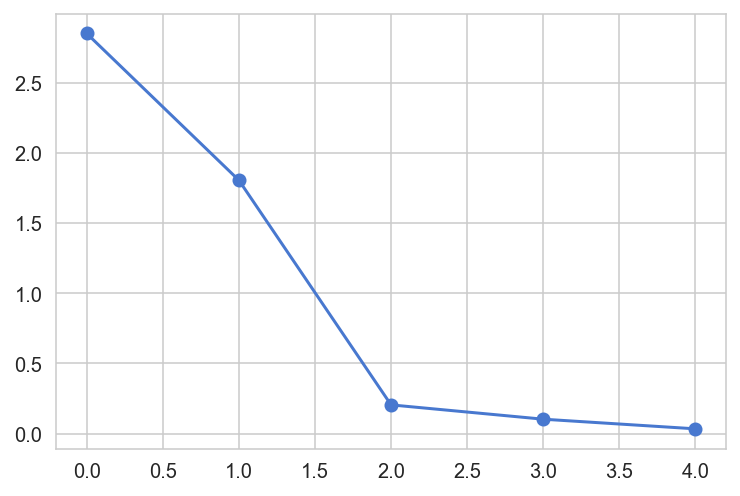

In [16]:
plt.plot(sorted_eigval, '-o');

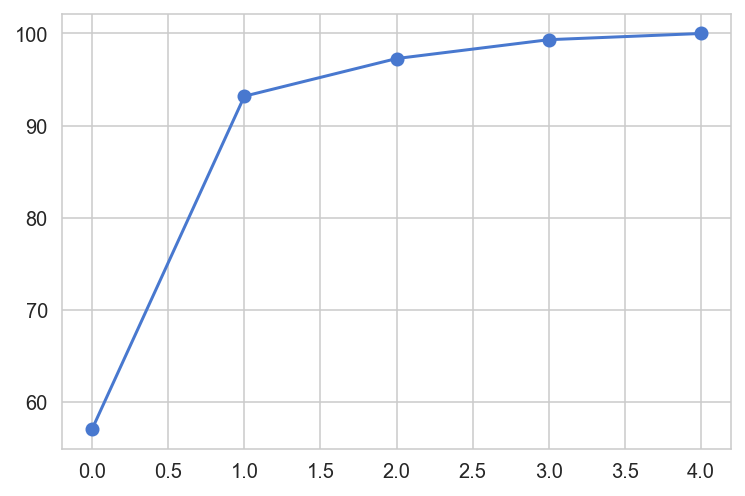

In [17]:
plt.plot(np.cumsum(sorted_eigval)*100/len(sorted_eigval), '-o');

In [18]:
fa_1 = FactorAnalyzer(n_factors=2, rotation=None, is_corr_matrix=True)

fa_1.fit(customer_corr)
print(fa_1.loadings_)

FactorAnalyzer(is_corr_matrix=True, n_factors=2, rotation=None,
               rotation_kwargs={})

[[ 0.5978  0.7919]
 [ 0.7096 -0.5029]
 [ 0.6732  0.7041]
 [ 0.8974 -0.1474]
 [ 0.7834 -0.585 ]]


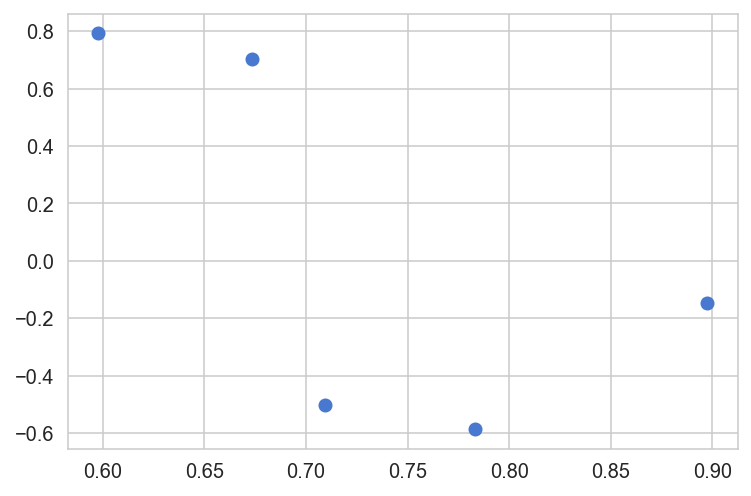

In [19]:
f1 = [0.5978, 0.7096, 0.6732, 0.8974, 0.7834]
f2 = [0.7919, -0.5029, 0.7041, -0.1474, -0.585]
plt.scatter(f1, f2)

In [20]:
fa_1.get_communalities()

array([0.9844, 0.7564, 0.949 , 0.827 , 0.9559])

In [21]:
fa_2 = FactorAnalyzer(n_factors=2, rotation='varimax', is_corr_matrix=True)

fa_2.fit(customer_corr)
print(fa_2.loadings_)

FactorAnalyzer(is_corr_matrix=True, n_factors=2, rotation='varimax',
               rotation_kwargs={})

[[ 0.0223  0.9919]
 [ 0.8697  0.0066]
 [ 0.1348  0.9648]
 [ 0.8143  0.4048]
 [ 0.9775 -0.0169]]


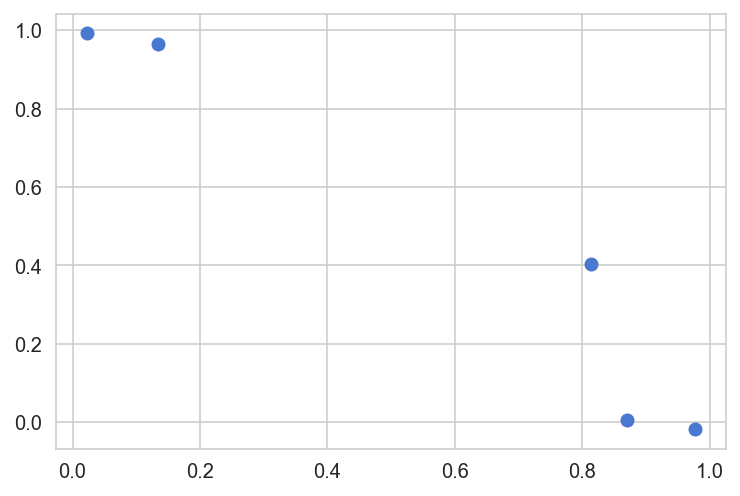

In [22]:
f1 = [0.0223, 0.8697, 0.1348, 0.8143, 0.9775]
f2 = [0.9919, 0.0066, 0.9648, 0.4048, -0.0169]
plt.scatter(f1, f2)

In [23]:
fa_2.get_communalities()

array([0.9844, 0.7564, 0.949 , 0.827 , 0.9559])